Классификатор на основе персептрона

Идея лежащая в основе нейрона Мак-Каллока-Питтса  и модели порогового персептрона Розенблатта, заключается в том, чтоб с помощью редукционистского подхода сымитировоть работу одиночного нейрона из головного мозга: он либо активируется, либо нет. 
Таким образом начальное правило может быть сведено к следующим шагам:
1. Инициировать веса нулями или небольшими случайными значениями
2. Для каждого обучающего образца x(i):
  а. Вычислить выходное значение y;
  б. Обновить веса.

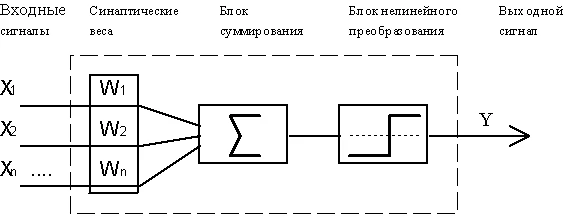


______________________________________________________________________


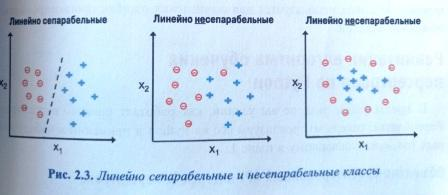



In [ ]:
import numpy as np

class Perceptron(object):
  """
  Классификатор на основе персептрона
  Параметры:
  eta : float - скорость обучения (значение между 0.0 и 1 )
  n_iter: int - количество проходов по обучающему набору
  random_state : int - начальное значение генератора случайных чисел для
  инициализации случайными весами

  w_ : 1d array - веса после подгонки
  errors_ : list - количество неправильных классификаций(обновлений)
  в каждой эпохе. 
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state 

  def fit(self,X,y):
    """функция обучения"""
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    self.errors_ = []
    """Цикл по эпохам обучения """
    for _ in range(self.n_iter):
      errors = 0
      """ цикл, проходов по обучающей выборке """     
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0 ) 
      self.errors_.append(errors)     
    return self

  def net_input(self,X):
    """вычисляем общий вход"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self,X):
    """ возвращаем метку класса """
    return np.where(self.net_input(X) >= 0.0 , 1, -1)


In [ ]:
import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None )
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


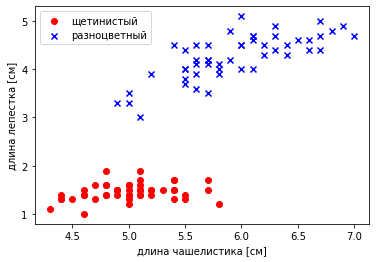

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# выбираем ирис щетинистый и ирис разноцветный из датасета (первые 100 записей) 
y = df.iloc[0:100, 4].values
# print(y) # можно просмотреть значения

# Вместо текста устанавлеваем значение класса  -1 и 1 
# np.where() - ищет заиси удовлетворяющие условию
y = np.where(y == 'Iris-setosa',-1, 1)
# print(y) # теперь у нас вектор из значений -1 и  1 

# Извлекаем значения длинны чашелистника и длинны лепестка
X = df.iloc[0:100,[0,2]].values
# print(X) # можно просмотреть значения

# Вычерчиваем график 
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()


Обучаем персептрон


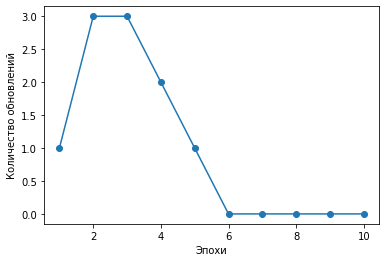

In [ ]:
ppn = Perceptron(eta = 0.1 , n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black') 

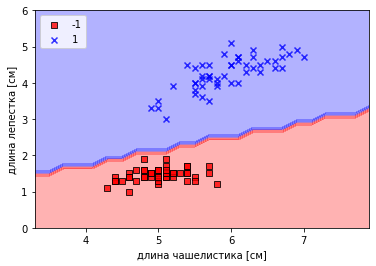

In [ ]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

Домашенее задание :
Средствами numpy создать два случайных линейносепарабельных множества с нормальным распределением. Обучить персептрон.
Подобрать максимальные значения стандартного отклонения при которых персептрон сможет разделять множества.  
Пример: 
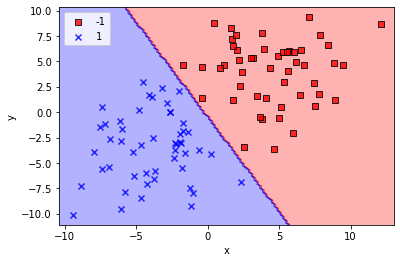